In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import tensorflow as tf

In [4]:
df = pd.read_excel('datafiles/Concrete_Data.xls')
df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [5]:
df.columns = ['cement', 'furnace', 'ash', 'water', 'superplasticizer', 'coarse', 'fine', 'age', 'strength']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   furnace           1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse            1030 non-null   float64
 6   fine              1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
x = df.drop('strength', axis=1)
y = df.strength

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
x_train_scaled.shape

(772, 8)

In [11]:
model = Sequential()
model.add(Dense(256, input_dim=8, activation='relu'))   # Dense : fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
hist = model.fit(x_train_scaled,y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 750.1287 - val_loss: 226.5719
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 200.6170 - val_loss: 171.7618
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 173.1793 - val_loss: 167.5269
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 153.1242 - val_loss: 161.5631
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 134.9577 - val_loss: 137.2625
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 116.0066 - val_loss: 120.9042
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 93.9020 - val_loss: 106.1338
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 77.8905 - val_loss: 82.6216
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 60.9276 - val_loss: 58.5882
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 49.5

62/62 [==============================] - 0s 1ms/step - loss: 12.4187 - val_loss: 28.1855
Epoch 82/100
62/62 [==============================] - 0s 1ms/step - loss: 11.8976 - val_loss: 30.1785
Epoch 83/100
62/62 [==============================] - 0s 1ms/step - loss: 12.3170 - val_loss: 29.4830
Epoch 84/100
62/62 [==============================] - 0s 1ms/step - loss: 11.9372 - val_loss: 32.0521
Epoch 85/100
62/62 [==============================] - 0s 1ms/step - loss: 13.1560 - val_loss: 27.7595
Epoch 86/100
62/62 [==============================] - 0s 1ms/step - loss: 13.8253 - val_loss: 28.5060
Epoch 87/100
62/62 [==============================] - 0s 1ms/step - loss: 16.4798 - val_loss: 27.8138
Epoch 88/100
62/62 [==============================] - 0s 1ms/step - loss: 12.7435 - val_loss: 26.5002
Epoch 89/100
62/62 [==============================] - 0s 1ms/step - loss: 13.0133 - val_loss: 25.5885
Epoch 90/100
62/62 [==============================] - 0s 1ms/step - loss: 13.9295 - val_loss: 3

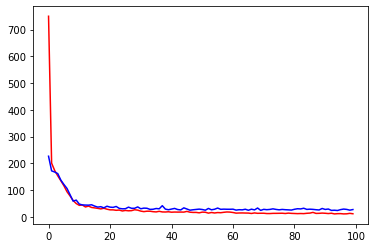

In [14]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

In [15]:
preds = model.predict(x_test_scaled)

In [17]:
preds = [v[0] for v in preds]
preds

[46.50009,
 35.83859,
 28.176922,
 34.544632,
 65.087906,
 32.634113,
 19.07315,
 13.051358,
 25.770466,
 20.697937,
 33.789753,
 44.896275,
 36.49911,
 57.723717,
 43.08805,
 58.186665,
 33.79899,
 27.05906,
 37.090813,
 18.761003,
 18.57259,
 29.982403,
 24.419704,
 31.834736,
 41.704918,
 37.546364,
 29.36105,
 15.253032,
 62.109364,
 47.520576,
 62.207253,
 38.44704,
 47.84778,
 31.308167,
 30.644033,
 43.44608,
 37.855682,
 45.590206,
 47.304886,
 33.26774,
 80.123215,
 43.188515,
 31.202631,
 39.93214,
 42.457054,
 29.490488,
 44.035503,
 19.894058,
 33.641457,
 25.128448,
 42.896835,
 48.32242,
 33.46649,
 33.344482,
 43.44879,
 48.656322,
 49.352463,
 43.135513,
 38.910435,
 33.38262,
 43.39223,
 13.257755,
 56.659122,
 35.188473,
 73.1071,
 23.38678,
 16.551548,
 53.180367,
 53.04438,
 86.29176,
 45.877262,
 50.173866,
 50.0073,
 45.62561,
 47.48504,
 25.237083,
 12.722657,
 71.34996,
 60.027557,
 54.0858,
 57.318737,
 40.93277,
 37.24767,
 44.624916,
 37.58646,
 78.24107,
 10

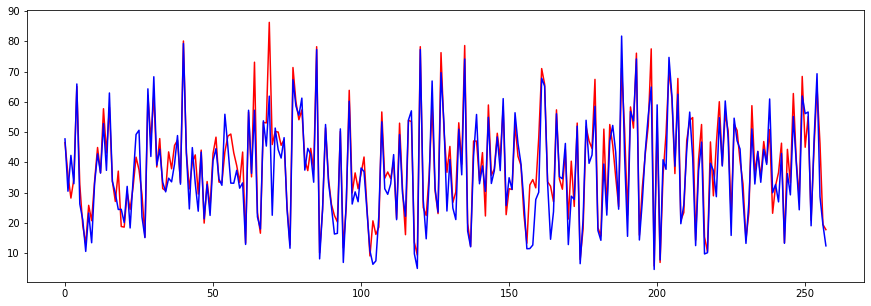

In [26]:
plt.figure(figsize=(15,5))
plt.plot(preds, c='r')
plt.plot(y_test.values, c='b')

In [19]:
preds

[46.50009,
 35.83859,
 28.176922,
 34.544632,
 65.087906,
 32.634113,
 19.07315,
 13.051358,
 25.770466,
 20.697937,
 33.789753,
 44.896275,
 36.49911,
 57.723717,
 43.08805,
 58.186665,
 33.79899,
 27.05906,
 37.090813,
 18.761003,
 18.57259,
 29.982403,
 24.419704,
 31.834736,
 41.704918,
 37.546364,
 29.36105,
 15.253032,
 62.109364,
 47.520576,
 62.207253,
 38.44704,
 47.84778,
 31.308167,
 30.644033,
 43.44608,
 37.855682,
 45.590206,
 47.304886,
 33.26774,
 80.123215,
 43.188515,
 31.202631,
 39.93214,
 42.457054,
 29.490488,
 44.035503,
 19.894058,
 33.641457,
 25.128448,
 42.896835,
 48.32242,
 33.46649,
 33.344482,
 43.44879,
 48.656322,
 49.352463,
 43.135513,
 38.910435,
 33.38262,
 43.39223,
 13.257755,
 56.659122,
 35.188473,
 73.1071,
 23.38678,
 16.551548,
 53.180367,
 53.04438,
 86.29176,
 45.877262,
 50.173866,
 50.0073,
 45.62561,
 47.48504,
 25.237083,
 12.722657,
 71.34996,
 60.027557,
 54.0858,
 57.318737,
 40.93277,
 37.24767,
 44.624916,
 37.58646,
 78.24107,
 10

In [24]:
y_test.values

array([47.73931824, 30.44726016, 42.29245784, 32.922479  , 65.90907927,
       26.22766704, 20.96696516, 10.53519328, 23.22155168, 13.39553372,
       33.05347944, 42.79577532, 36.44570136, 52.82075636, 37.34202016,
       62.93536928, 33.72916592, 29.7508894 , 24.40055564, 24.44881896,
       20.08443588, 32.03994972, 18.28766142, 34.23937816, 49.20100736,
       50.60064364, 21.91706309, 15.09125069, 64.30053176, 41.9346198 ,
       68.29949256, 39.0560575 , 44.38846488, 33.39821744, 30.2335226 ,
       34.73580088, 33.5430074 , 39.45181672, 48.8466167 , 32.76389952,
       79.29663476, 43.01296026, 24.5798194 , 44.86420332, 33.01900564,
       23.8358748 , 43.37700359, 21.29101888, 32.72253096, 22.43554904,
       40.56325203, 44.51946532, 34.48758952, 32.40123514, 55.89581932,
       45.2985732 , 33.11691123, 33.08243743, 37.36339392, 31.44700036,
       33.19206412, 12.83804312, 57.21823429, 36.3498642 , 57.226508  ,
       21.94602108, 17.95395504, 53.72396992, 45.3675208 , 61.88

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)

In [28]:
r2

0.863213211944249